In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# `hpcc`

In [23]:
hpcc_raw = pd.read_csv('hpcc - cleaner.csv')
hpcc_raw.rename(columns={'RUN':'metric'}, inplace=True)

## compute metrics

In [24]:

compute_metrics = ['HPL_Gflops','StarDGEMM_Gflops','SingleDGEMM_Gflops','StarFFT_Gflops','SingleFFT_Gflops','MPIFFT_Gflops']

hpcc_raw['metric'] = hpcc_raw['metric'].replace(
    {m: m.replace('_Gflops', '') for m in compute_metrics}
)

In [25]:
hpcc_raw['metric']
compute_metrics = ['HPL','StarDGEMM','SingleDGEMM','StarFFT','SingleFFT','MPIFFT']

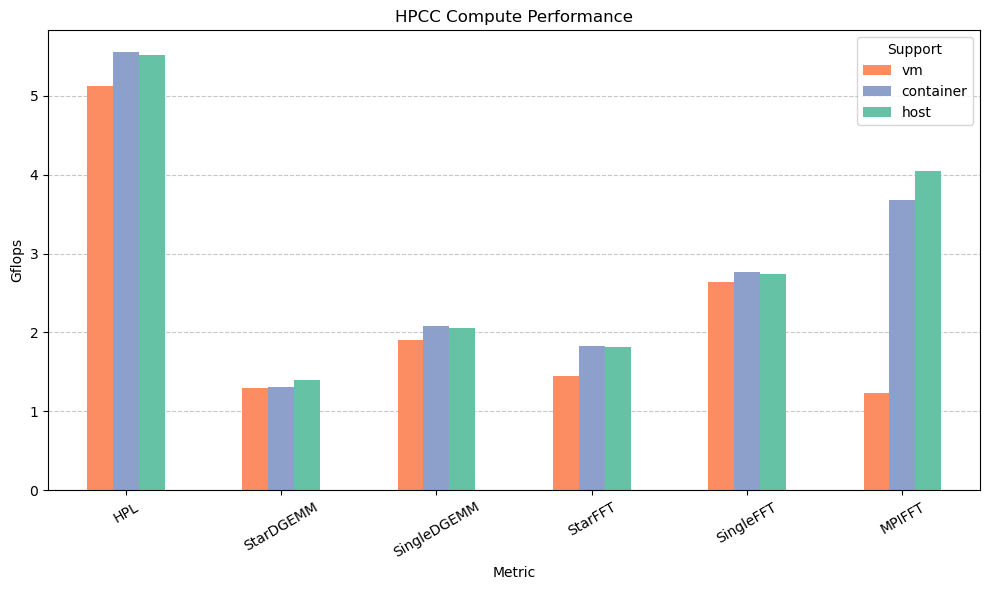

In [26]:
compute_df = hpcc_raw[hpcc_raw['metric'].isin(compute_metrics)]

# Set metric as index for plotting
compute_df_plot = compute_df.set_index('metric')[['vm', 'container', 'host']]

palette = sns.color_palette("Set2", 3)
# Plot

fig, ax = plt.subplots(figsize=(10, 6))
compute_df_plot.plot(kind='bar', color=[palette[1], palette[2], palette[0]], ax=ax, zorder=2)
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)  # Grid behind bars
ax.set_title('HPCC Compute Performance')
ax.set_ylabel('Gflops')
ax.set_xlabel('Metric')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.legend(title='Support')
plt.tight_layout()
plt.show()

# Save the plot as png in direcory../assets
fig.savefig('../assets/hpcc_compute_performance.png', dpi=300, bbox_inches='tight')

## memory and bandwidth

In [27]:
hpcc_raw['metric']

0                                      HPL
1                                StarDGEMM
2                              SingleDGEMM
3                                  StarFFT
4                                SingleFFT
5                                   MPIFFT
6                                      NaN
7                   StarSTREAM_Copy (GB/s)
8                         StarSTREAM_Scale
9                           StarSTREAM_Add
10                        StarSTREAM_Triad
11                       SingleSTREAM_Copy
12                      SingleSTREAM_Scale
13                        SingleSTREAM_Add
14                      SingleSTREAM_Triad
15                              PTRANS_GBs
16                MPIRandomAccess_LCG_GUPs
17                    MPIRandomAccess_GUPs
18               StarRandomAccess_LCG_GUPs
19             SingleRandomAccess_LCG_GUPs
20                   StarRandomAccess_GUPs
21                 SingleRandomAccess_GUPs
22                                     NaN
23     Rand

In [28]:
star_stream_metrics = ['StarSTREAM_Copy (GB/s)','StarSTREAM_Scale', 'StarSTREAM_Add','StarSTREAM_Triad']
single_stream_metrics = ['SingleSTREAM_Copy', 'SingleSTREAM_Scale', 'SingleSTREAM_Add', 'SingleSTREAM_Triad']

ptrans_metric = ['PTRANS_GBs']


In [29]:
stream_df = hpcc_raw[hpcc_raw['metric'].isin(star_stream_metrics + single_stream_metrics)]

# renaming the metrics for plotting
stream_df['metric'] = stream_df['metric'].replace(
    {m: m.replace('StarSTREAM_', 'Star ') for m in stream_df['metric']}
)
stream_df['metric'] = stream_df['metric'].replace(
    {m: m.replace('SingleSTREAM_', 'Single ') for m in stream_df['metric']}
)
stream_df['metric'] = stream_df['metric'].replace('Star Copy (GB/s)','Star Copy')
stream_df

/tmp/ipykernel_7385/418983220.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stream_df['metric'] = stream_df['metric'].replace(
/tmp/ipykernel_7385/418983220.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stream_df['metric'] = stream_df['metric'].replace(
/tmp/ipykernel_7385/418983220.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

,metric,vm,container,host
7,Star Copy,5.033903,5.406483,5.388747
8,Star Scale,3.342773,3.553517,3.560480
9,Star Add,3.753100,4.075677,4.070387
10,Star Triad,3.722077,4.022163,3.999820
11,Single Copy,22.298533,24.109567,23.444100
12,Single Scale,13.261367,14.231300,14.058467
13,Single Add,14.398333,15.380100,15.062733
14,Single Triad,14.435533,15.475833,15.217567


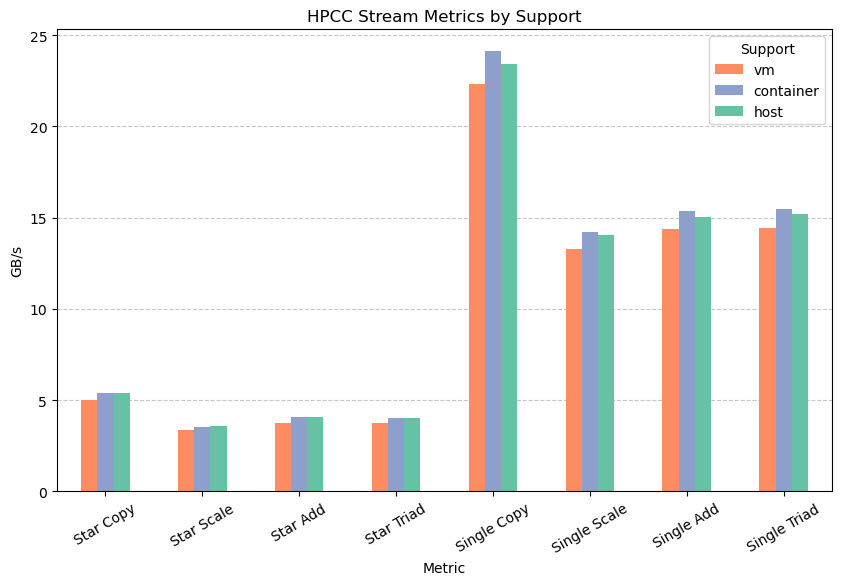

In [30]:
# Plot
# Set metric as index for plotting
stream_df_plot = stream_df.set_index('metric')[['vm', 'container', 'host']]
fig, ax = plt.subplots(figsize=(10, 6))
stream_df_plot.plot(kind='bar', color=[palette[1], palette[2], palette[0]], ax=ax, zorder=2)
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)  # Grid behind bars
ax.set_title('HPCC Stream Metrics by Support')
ax.set_ylabel('GB/s')
ax.set_xlabel('Metric')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.legend(title='Support')
plt.show()

# Save the plot as png in direcory../assets
fig.savefig('../assets/hpcc_stream_performance.png', dpi=300, bbox_inches='tight')


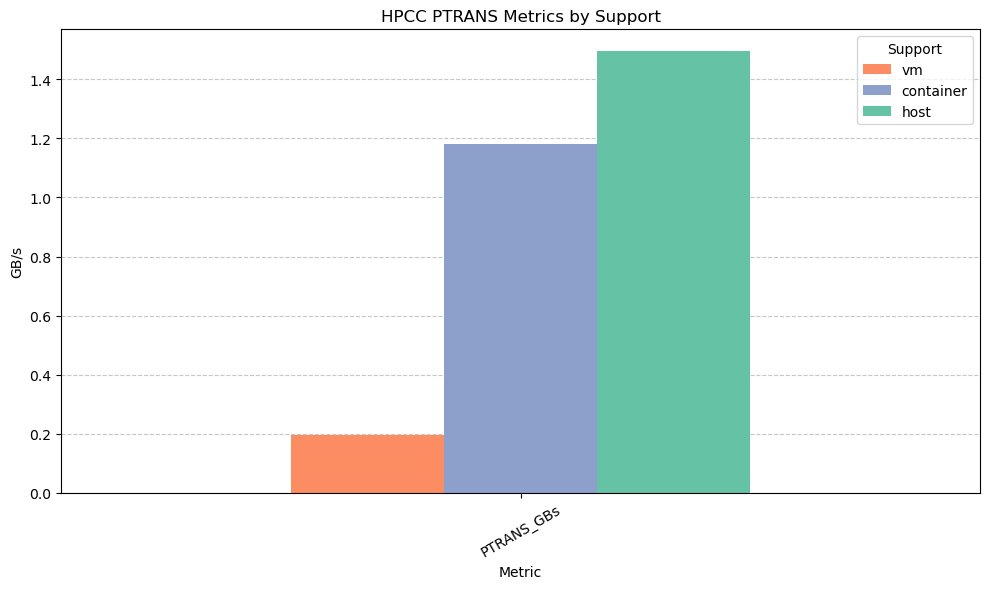

In [31]:
# Plot PTRANS
ptrans_df = hpcc_raw[hpcc_raw['metric'].isin(ptrans_metric)]
ptrans_df_plot = ptrans_df.set_index('metric')[['vm', 'container', 'host']]
fig, ax = plt.subplots(figsize=(10, 6))
ptrans_df_plot.plot(kind='bar', color=[palette[1], palette[2], palette[0]], ax=ax, zorder=2)
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)  # Grid behind bars
ax.set_title('HPCC PTRANS Metrics by Support')
ax.set_ylabel('GB/s')
ax.set_xlabel('Metric')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.legend(title='Support')
plt.tight_layout()
plt.show()

In [32]:
random_access_metric = ['MPIRandomAccess_LCG_GUPs', 'MPIRandomAccess_GUPs', 'StarRandomAccess_LCG_GUPs', 'SingleRandomAccess_LCG_GUPs', 'StarRandomAccess_GUPs', 'SingleRandomAccess_GUPs']

random_access_df = hpcc_raw[hpcc_raw['metric'].isin(random_access_metric)]

random_access_df

,metric,vm,container,host
16,MPIRandomAccess_LCG_GUPs,0.002246,0.002636,0.034254
17,MPIRandomAccess_GUPs,0.002285,0.002596,0.031582
18,StarRandomAccess_LCG_GUPs,0.005709,0.013855,0.014289
19,SingleRandomAccess_LCG_GUPs,0.023816,0.041920,0.047403
20,StarRandomAccess_GUPs,0.005535,0.013226,0.013213
21,SingleRandomAccess_GUPs,0.025557,0.044713,0.046886


In [33]:

# remove the '_GUPs' from the metric names for random access
random_access_df['metric'] = random_access_df['metric'].replace(
    {m: m.replace('_GUPs', '') for m in random_access_df['metric']}
)
random_access_df['metric'] = random_access_df['metric'].replace(
    {m: m.replace('RandomAccess_', ' ') for m in random_access_df['metric']}
)
random_access_df['metric'] = random_access_df['metric'].replace(
    {m: m.replace('RandomAccess', '') for m in random_access_df['metric']}
)

random_access_df['metric']

/tmp/ipykernel_7385/611903842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_access_df['metric'] = random_access_df['metric'].replace(
/tmp/ipykernel_7385/611903842.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_access_df['metric'] = random_access_df['metric'].replace(
/tmp/ipykernel_7385/611903842.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

16       MPI LCG
17           MPI
18      Star LCG
19    Single LCG
20          Star
21        Single
Name: metric, dtype: object

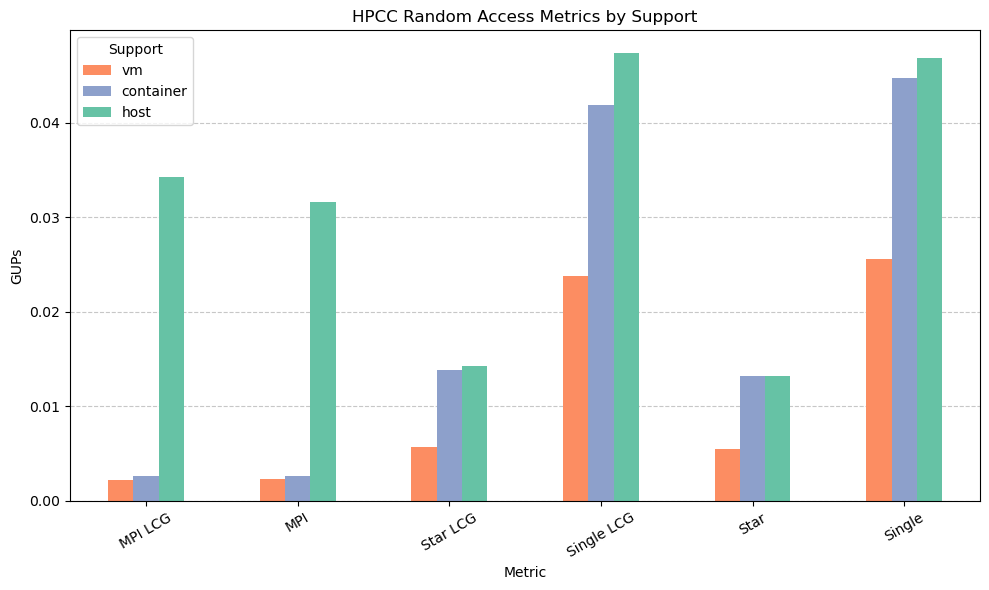

In [34]:
# Plot Random Access

random_access_df_plot = random_access_df.set_index('metric')[['vm', 'container', 'host']]
fig, ax = plt.subplots(figsize=(10, 6))
random_access_df_plot.plot(kind='bar', color=[palette[1], palette[2], palette[0]], ax=ax, zorder=2)
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)  # Grid behind bars
ax.set_title('HPCC Random Access Metrics by Support')
ax.set_ylabel('GUPs')
ax.set_xlabel('Metric')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.legend(title='Support')
plt.tight_layout()
plt.show()

# Save the plot as png in direcory../assets
fig.savefig('../assets/hpcc_random_access_performance.png', dpi=300, bbox_inches='tight')

## comunication (latency and bandwidth)

In [35]:
bandwidth_metric = ['RandomlyOrderedRingBandwidth_GBytes',
                    'NaturallyOrderedRingBandwidth_GBytes',
                    'MaxPingPongBandwidth_GBytes',
                    'AvgPingPongBandwidth_GBytes',
                    'MinPingPongBandwidth_GBytes']
bandwidth_df = hpcc_raw[hpcc_raw['metric'].isin(bandwidth_metric)]
bandwidth_df['metric'] = bandwidth_df['metric'].replace(
    {m: m.replace('Bandwidth_GBytes', '') for m in bandwidth_df['metric']}
)
bandwidth_df

/tmp/ipykernel_7385/3977989382.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bandwidth_df['metric'] = bandwidth_df['metric'].replace(


,metric,vm,container,host
23,RandomlyOrderedRing,0.119793,1.857003,2.970567
25,NaturallyOrderedRing,0.145474,2.063597,3.100710
27,MaxPingPong,11.382977,13.725733,13.908367
28,AvgPingPong,3.616830,7.943350,12.749900
29,MinPingPong,0.230330,4.995497,11.516867


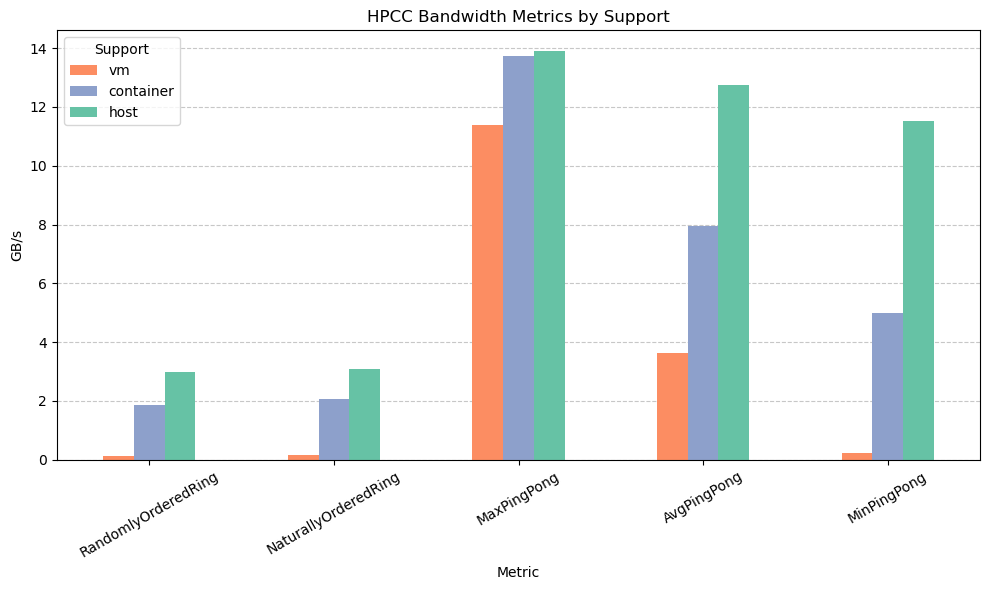

In [36]:
# plot bandwidth
bandwidth_df_plot = bandwidth_df.set_index('metric')[['vm', 'container', 'host']]
fig, ax = plt.subplots(figsize=(10, 6))
bandwidth_df_plot.plot(kind='bar', color=[palette[1], palette[2], palette[0]], ax=ax, zorder=2)
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)  # Grid behind bars
ax.set_title('HPCC Bandwidth Metrics by Support')
ax.set_ylabel('GB/s')
ax.set_xlabel('Metric')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.legend(title='Support')
plt.tight_layout()
plt.show()

# Save the plot as png in direcory../assets
fig.savefig('../assets/hpcc_bandwidth_performance.png', dpi=300, bbox_inches='tight')

In [37]:
latency_metric = ['RandomlyOrderedRingLatency_usec',
'NaturallyOrderedRingLatency_usec',
'MaxPingPongLatency_usec',
'AvgPingPongLatency_usec',
'MinPingPongLatency_usec']
latency_df = hpcc_raw[hpcc_raw['metric'].isin(latency_metric)]
latency_df['metric'] = latency_df['metric'].replace(
    {m: m.replace('Latency_usec', '') for m in latency_df['metric']}
)

/tmp/ipykernel_7385/2572388156.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latency_df['metric'] = latency_df['metric'].replace(


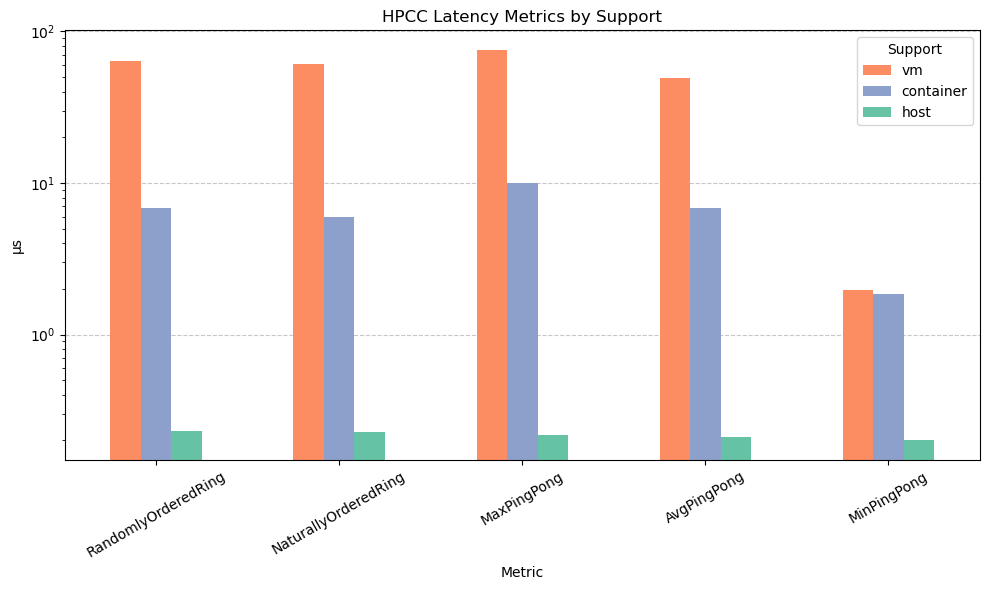

In [38]:
# plot latency
latency_df_plot = latency_df.set_index('metric')[['vm', 'container', 'host']]
fig, ax = plt.subplots(figsize=(10, 6))
latency_df_plot.plot(kind='bar', color=[palette[1], palette[2], palette[0]], ax=ax, zorder=2)
ax.set_yscale('log')
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)  # Grid behind bars
ax.set_title('HPCC Latency Metrics by Support')
ax.set_ylabel('μs')
ax.set_xlabel('Metric')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.legend(title='Support')
plt.tight_layout()
plt.show()

# Save the plot as png in direcory../assets
fig.savefig('../assets/hpcc_latency_performance.png', dpi=300, bbox_inches='tight')

# `stress-ng`

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
stressng_raw = pd.read_csv('stress-ng - clean.csv')
stressng_raw.head()
stressng_raw.rename(columns={'Bogo Ops/s (Real Time)':'Real Time', 'Bogo Ops/s (Usr+Sys Time)':'Usr+Sys Time'}, inplace=True)
stressng_raw.head()

,Support,stressor,Real Time,Usr+Sys Time
0,vm,cpu,933.13,933.67
1,vm,cpu,930.14,931.87
2,vm,cpu,929.84,931.11
3,vm,cpu,929.57,930.7
4,vm,cpu,907.39,908.36


In [41]:
vm_cpu_df = stressng_raw[(stressng_raw['Support'] == 'vm') & (stressng_raw['stressor'] == 'cpu')].copy()
vm_cpu_df.drop(columns=['Support', 'stressor'], inplace=True)
vm_memory_df = stressng_raw[(stressng_raw['Support'] == 'vm') & (stressng_raw['stressor'] == 'memory')].copy()
vm_memory_df.drop(columns=['Support', 'stressor'], inplace=True)
vm_hdd_df = stressng_raw[(stressng_raw['Support'] == 'vm') & (stressng_raw['stressor'] == 'hdd')].copy()
vm_hdd_df.drop(columns=['Support', 'stressor'], inplace=True)
vm_memory_df


,Real Time,Usr+Sys Time
40,"40,182.77","42,949.06"
41,"40,030.53","43,461.27"
42,"40,034.76","43,565.01"
43,"39,275.36","41,228.56"
44,"40,374.06","40,446.34"
45,"40,379.02","40,449.14"
46,"40,377.88","40,420.53"
47,"39,968.61","41,579.86"
48,"40,103.07","41,594.15"
49,"40,127.02","41,436.65"


In [42]:

container_cpu_df = stressng_raw[(stressng_raw['Support'] == 'container') & (stressng_raw['stressor'] == 'cpu')].copy()
container_cpu_df.drop(columns=['Support', 'stressor'], inplace=True)
container_memory_df = stressng_raw[(stressng_raw['Support'] == 'container') & (stressng_raw['stressor'] == 'memory')].copy()
container_memory_df.drop(columns=['Support', 'stressor'], inplace=True)
container_hdd_df = stressng_raw[(stressng_raw['Support'] == 'container') & (stressng_raw['stressor'] == 'hdd')].copy()
container_hdd_df.drop(columns=['Support', 'stressor'], inplace=True)

host_cpu_df = stressng_raw[(stressng_raw['Support'] == 'host') & (stressng_raw['stressor'] == 'cpu')].copy()
host_cpu_df.drop(columns=['Support', 'stressor'], inplace=True)
host_memory_df = stressng_raw[(stressng_raw['Support'] == 'host') & (stressng_raw['stressor'] == 'memory')].copy()
host_memory_df.drop(columns=['Support', 'stressor'], inplace=True)
host_hdd_df = stressng_raw[(stressng_raw['Support'] == 'host') & (stressng_raw['stressor'] == 'hdd')].copy()
host_hdd_df.drop(columns=['Support', 'stressor'], inplace=True)

In [43]:
# Convert columns to numeric before calculating the mean
vm_cpu_df = vm_cpu_df.apply(pd.to_numeric, errors='coerce')

print('Real Time: ', vm_cpu_df['Real Time'].mean())
print('Real Time Std: ', vm_cpu_df['Real Time'].std())
print('Usr+Sys Time: ', vm_cpu_df['Usr+Sys Time'].mean())
print('Usr+Sys Time Std: ', vm_cpu_df['Usr+Sys Time'].std())

# container
container_cpu_df = container_cpu_df.apply(pd.to_numeric, errors='coerce')
print('Real Time: ', container_cpu_df['Real Time'].mean())
print('Real Time Std: ', container_cpu_df['Real Time'].std())
print('Usr+Sys Time: ', container_cpu_df['Usr+Sys Time'].mean())
print('Usr+Sys Time Std: ', container_cpu_df['Usr+Sys Time'].std())
# host
host_cpu_df = host_cpu_df.apply(pd.to_numeric, errors='coerce')
print('Real Time: ', host_cpu_df['Real Time'].mean())
print('Real Time Std: ', host_cpu_df['Real Time'].std())
print('Usr+Sys Time: ', host_cpu_df['Usr+Sys Time'].mean())
print('Usr+Sys Time Std: ', host_cpu_df['Usr+Sys Time'].std())

Real Time:  924.9545
Real Time Std:  8.092865262556575
Usr+Sys Time:  926.1924999999999
Usr+Sys Time Std:  7.904317191456697
Real Time:  1340.9215
Real Time Std:  13.443667761988825
Usr+Sys Time:  1342.236
Usr+Sys Time Std:  13.451038073812668
Real Time:  1348.9825
Real Time Std:  16.17270861505174
Usr+Sys Time:  1349.2445
Usr+Sys Time Std:  16.192127871283624


In [44]:
means = [
    vm_cpu_df['Real Time'].mean(),
    vm_cpu_df['Usr+Sys Time'].mean(),
    container_cpu_df['Real Time'].mean(),
    container_cpu_df['Usr+Sys Time'].mean(),
    host_cpu_df['Real Time'].mean(),
    host_cpu_df['Usr+Sys Time'].mean()
]
stds = [
    vm_cpu_df['Real Time'].std(),
    vm_cpu_df['Usr+Sys Time'].std(),
    container_cpu_df['Real Time'].std(),
    container_cpu_df['Usr+Sys Time'].std(),
    host_cpu_df['Real Time'].std(),
    host_cpu_df['Usr+Sys Time'].std()
]

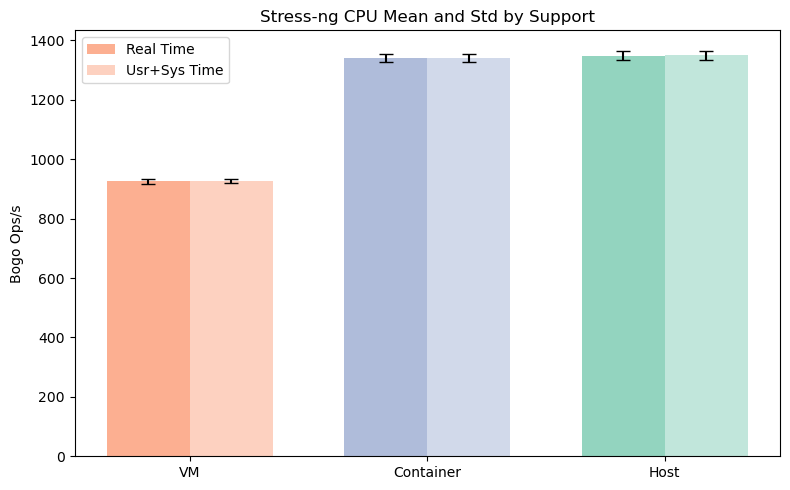

In [45]:
# Prepare means_array and stds_array from the existing means and stds lists
means_array = np.array(means).reshape(3, 2)
stds_array = np.array(stds).reshape(3, 2)

labels = ['VM', 'Container', 'Host']
metrics = ['Real Time', 'Usr+Sys Time']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))

palette = sns.color_palette("Set2", 3)
custom_colors = [palette[1], palette[2], palette[0]]

for i, metric in enumerate(metrics):
    ax.bar(x + i*width - width/2, means_array[:, i], width, yerr=stds_array[:, i],
           label=metric, color=[custom_colors[j] for j in range(len(labels))], capsize=5, alpha=0.7 if i == 0 else 0.4)

ax.set_ylabel('Bogo Ops/s')
ax.set_title('Stress-ng CPU Mean and Std by Support')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()

# Save the plot as png in direcory../assets
fig.savefig('../assets/stressng_cpu_performance.png', dpi=300, bbox_inches='tight')

In [47]:
# Memory
# Convert columns to numeric before calculating the mean
vm_memory_df['Real Time'] = pd.to_numeric(vm_memory_df['Real Time'].str.replace(',', ''), errors='coerce')
vm_memory_df['Usr+Sys Time'] = pd.to_numeric(vm_memory_df['Usr+Sys Time'].str.replace(',', ''), errors='coerce')
print('Real Time: ', vm_memory_df['Real Time'].mean())
print('Real Time Std: ', vm_memory_df['Real Time'].std())
print('Usr+Sys Time: ', vm_memory_df['Usr+Sys Time'].mean())
print('Usr+Sys Time Std: ', vm_memory_df['Usr+Sys Time'].std())
# container
container_memory_df = container_memory_df.apply(pd.to_numeric, errors='coerce')
print('Real Time: ', container_memory_df['Real Time'].mean())
print('Real Time Std: ', container_memory_df['Real Time'].std())
print('Usr+Sys Time: ', container_memory_df['Usr+Sys Time'].mean())
print('Usr+Sys Time Std: ', container_memory_df['Usr+Sys Time'].std())
# host
host_memory_df = host_memory_df.apply(pd.to_numeric, errors='coerce')
print('Real Time: ', host_memory_df['Real Time'].mean())
print('Real Time Std: ', host_memory_df['Real Time'].std())
print('Usr+Sys Time: ', host_memory_df['Usr+Sys Time'].mean())
print('Usr+Sys Time Std: ', host_memory_df['Usr+Sys Time'].std())

Real Time:  40182.6865
Real Time Std:  265.4174647859875
Usr+Sys Time:  41433.749500000005
Usr+Sys Time Std:  951.507057116153
Real Time:  52180.350000000006
Real Time Std:  5024.639648701774
Usr+Sys Time:  66543.32166666666
Usr+Sys Time Std:  2954.414005484496
Real Time:  53899.87176470588
Real Time Std:  4947.8459978954925
Usr+Sys Time:  62686.96647058823
Usr+Sys Time Std:  3254.2196240053877


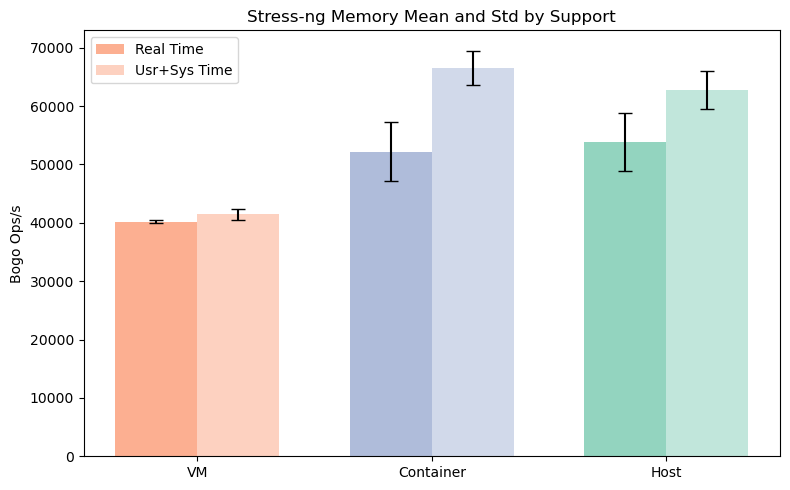

In [48]:
# plot memory
means = [
    vm_memory_df['Real Time'].mean(),
    vm_memory_df['Usr+Sys Time'].mean(),
    container_memory_df['Real Time'].mean(),
    container_memory_df['Usr+Sys Time'].mean(),
    host_memory_df['Real Time'].mean(),
    host_memory_df['Usr+Sys Time'].mean()
]
stds = [
    vm_memory_df['Real Time'].std(),
    vm_memory_df['Usr+Sys Time'].std(),
    container_memory_df['Real Time'].std(),
    container_memory_df['Usr+Sys Time'].std(),
    host_memory_df['Real Time'].std(),
    host_memory_df['Usr+Sys Time'].std()
]
# Prepare means_array and stds_array from the existing means and stds lists
means_array = np.array(means).reshape(3, 2)
stds_array = np.array(stds).reshape(3, 2)
labels = ['VM', 'Container', 'Host']
metrics = ['Real Time', 'Usr+Sys Time']
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize=(8, 5))
palette = sns.color_palette("Set2", 3)
custom_colors = [palette[1], palette[2], palette[0]]
for i, metric in enumerate(metrics):
    ax.bar(x + i*width - width/2, means_array[:, i], width, yerr=stds_array[:, i],
           label=metric, color=[custom_colors[j] for j in range(len(labels))], capsize=5, alpha=0.7 if i == 0 else 0.4)
ax.set_ylabel('Bogo Ops/s')
ax.set_title('Stress-ng Memory Mean and Std by Support')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()

# Save the plot as png in direcory../assets
fig.savefig('../assets/stressng_memory_performance.png', dpi=300, bbox_inches='tight')

Real Time:  1080.4014999999997
Real Time Std:  60.999059205428445
Usr+Sys Time:  7338.567499999999
Usr+Sys Time Std:  768.3790180898939
Real Time:  674.6494999999999
Real Time Std:  60.19301275021355
Usr+Sys Time:  5252.8375
Usr+Sys Time Std:  562.5281471869932
Real Time:  776.254
Real Time Std:  60.63222622370141
Usr+Sys Time:  5287.1255
Usr+Sys Time Std:  332.04750214191387


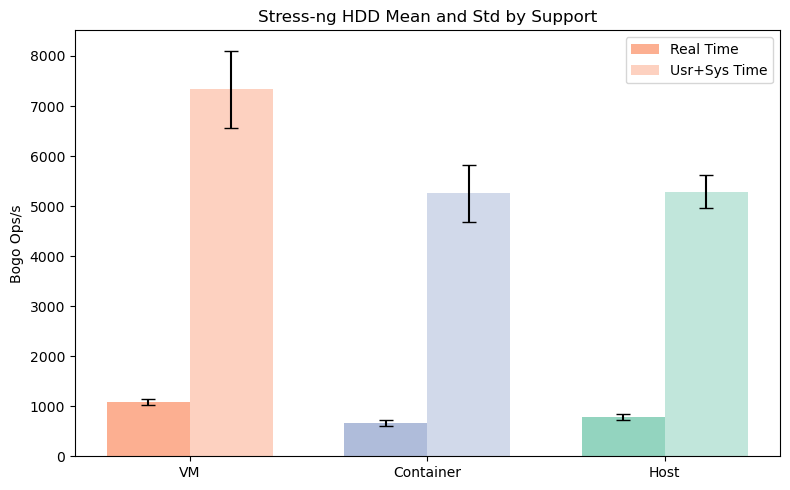

In [49]:
# hdd
vm_hdd_df['Real Time'] = pd.to_numeric(vm_hdd_df['Real Time'].str.replace(',', ''), errors='coerce')
vm_hdd_df['Usr+Sys Time'] = pd.to_numeric(vm_hdd_df['Usr+Sys Time'].str.replace(',', ''), errors='coerce')
print('Real Time: ', vm_hdd_df['Real Time'].mean())
print('Real Time Std: ', vm_hdd_df['Real Time'].std())
print('Usr+Sys Time: ', vm_hdd_df['Usr+Sys Time'].mean())
print('Usr+Sys Time Std: ', vm_hdd_df['Usr+Sys Time'].std())
# container
container_hdd_df = container_hdd_df.apply(pd.to_numeric, errors='coerce')
print('Real Time: ', container_hdd_df['Real Time'].mean())
print('Real Time Std: ', container_hdd_df['Real Time'].std())
print('Usr+Sys Time: ', container_hdd_df['Usr+Sys Time'].mean())
print('Usr+Sys Time Std: ', container_hdd_df['Usr+Sys Time'].std())
# host
host_hdd_df = host_hdd_df.apply(pd.to_numeric, errors='coerce')
print('Real Time: ', host_hdd_df['Real Time'].mean())
print('Real Time Std: ', host_hdd_df['Real Time'].std())
print('Usr+Sys Time: ', host_hdd_df['Usr+Sys Time'].mean())
print('Usr+Sys Time Std: ', host_hdd_df['Usr+Sys Time'].std())
# plot hdd
means = [
    vm_hdd_df['Real Time'].mean(),
    vm_hdd_df['Usr+Sys Time'].mean(),
    container_hdd_df['Real Time'].mean(),
    container_hdd_df['Usr+Sys Time'].mean(),
    host_hdd_df['Real Time'].mean(),
    host_hdd_df['Usr+Sys Time'].mean()
]
stds = [
    vm_hdd_df['Real Time'].std(),
    vm_hdd_df['Usr+Sys Time'].std(),
    container_hdd_df['Real Time'].std(),
    container_hdd_df['Usr+Sys Time'].std(),
    host_hdd_df['Real Time'].std(),
    host_hdd_df['Usr+Sys Time'].std()
]
# Prepare means_array and stds_array from the existing means and stds lists
means_array = np.array(means).reshape(3, 2)
stds_array = np.array(stds).reshape(3, 2)
labels = ['VM', 'Container', 'Host']
metrics = ['Real Time', 'Usr+Sys Time']
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize=(8, 5))
palette = sns.color_palette("Set2", 3)
custom_colors = [palette[1], palette[2], palette[0]]
for i, metric in enumerate(metrics):
    ax.bar(x + i*width - width/2, means_array[:, i], width, yerr=stds_array[:, i],
           label=metric, color=[custom_colors[j] for j in range(len(labels))], capsize=5, alpha=0.7 if i == 0 else 0.4)
ax.set_ylabel('Bogo Ops/s')
ax.set_title('Stress-ng HDD Mean and Std by Support')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()

# Save the plot as png in direcory../assets
fig.savefig('../assets/stressng_hdd_performance.png', dpi=300, bbox_inches='tight')

# `sysbench`

In [114]:
sysbench_cpu = pd.read_csv('sysbench - cpu.csv')

to_drop = ['total_time', 'total_events', 'latency_95th',
            'latency_sum',	'fairness_events_avg',	'fairness_events_stddev',	
            'fairness_time_avg',	'fairness_time_stddev']
sysbench_cpu.drop(columns=to_drop, inplace=True)


In [115]:
vm_cpu_df = sysbench_cpu[sysbench_cpu['support'] == 'vm'].copy()
vm_cpu_df.drop(columns=['support'], inplace=True)
vm_cpu_means = vm_cpu_df.mean()
vm_cpu_sd = vm_cpu_df.std()

# container
container_cpu_df = sysbench_cpu[sysbench_cpu['support'] == 'container'].copy()
container_cpu_df.drop(columns=['support'], inplace=True)
container_cpu_means = container_cpu_df.mean()
container_cpu_sd = container_cpu_df.std()
# host
host_cpu_df = sysbench_cpu[sysbench_cpu['support'] == 'host'].copy()
host_cpu_df.drop(columns=['support'], inplace=True)
host_cpu_means = host_cpu_df.mean()
host_cpu_sd = host_cpu_df.std()

print('VM CPU means: ', vm_cpu_means)
print('VM CPU SD: ', vm_cpu_sd)
print('Container CPU means: ', container_cpu_means)
print('Container CPU SD: ', container_cpu_sd)
print('Host CPU means: ', host_cpu_means)
print('Host CPU SD: ', host_cpu_sd)

VM CPU means:  events_per_sec    453.974706
latency_min         2.041765
latency_avg         2.202941
latency_max         6.050588
dtype: float64
VM CPU SD:  events_per_sec    1.276093
latency_min       0.012367
latency_avg       0.006860
latency_max       1.181506
dtype: float64
Container CPU means:  events_per_sec    459.738889
latency_min         2.031111
latency_avg         2.173889
latency_max         6.145000
dtype: float64
Container CPU SD:  events_per_sec    2.542694
latency_min       0.004714
latency_avg       0.011448
latency_max       2.728012
dtype: float64
Host CPU means:  events_per_sec    452.3815
latency_min         2.0510
latency_avg         2.2105
latency_max         5.4925
dtype: float64
Host CPU SD:  events_per_sec    6.758361
latency_min       0.015861
latency_avg       0.033162
latency_max       1.555418
dtype: float64


In [116]:
colors = sns.color_palette('Set2')
custom_palette = {
    'vm': colors[1],   # originally palette[1]
    'container': colors[2],  # originally palette[2]
    'host': colors[0],  # originally palette[0]
}


/tmp/ipykernel_19218/4194588570.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='support', y='events_per_sec', data=sysbench_cpu, palette=custom_palette)


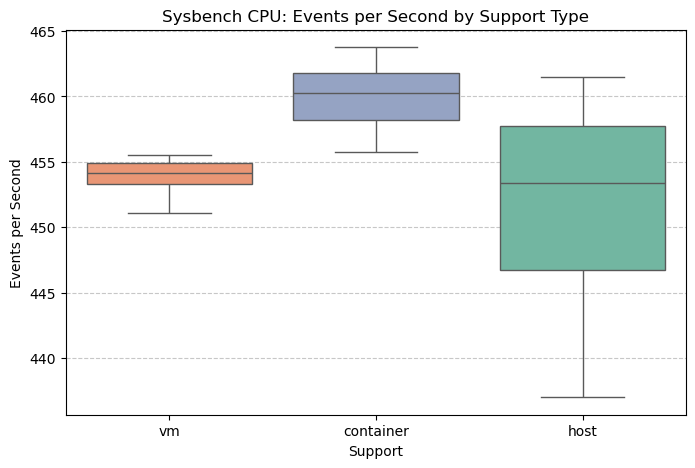

/tmp/ipykernel_19218/4194588570.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='support', y='latency_avg', data=sysbench_cpu, palette=custom_palette)


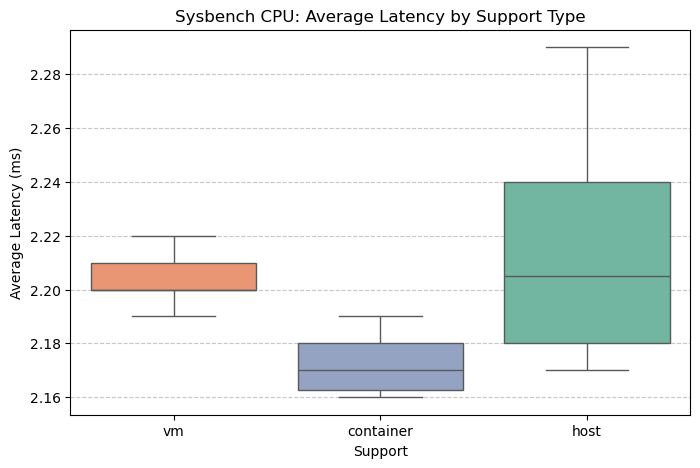

In [143]:
# Boxplot of events_per_sec by support type
plt.figure(figsize=(8, 5))
sns.boxplot(x='support', y='events_per_sec', data=sysbench_cpu, palette=custom_palette)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Sysbench CPU: Events per Second by Support Type')
plt.ylabel('Events per Second')
plt.xlabel('Support')
plt.show()

# Boxplot of latency_avg by support type
plt.figure(figsize=(8, 5))
sns.boxplot(x='support', y='latency_avg', data=sysbench_cpu, palette=custom_palette)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Sysbench CPU: Average Latency by Support Type')
plt.ylabel('Average Latency (ms)')
plt.xlabel('Support')
plt.show()


In [153]:
sysbench_memory = pd.read_csv('sysbench - memory.csv')
sysbench_memory.head()


,support,total_operations,ops_per_sec,transfer_mib,transfer_rate_mibs,total_time,latency_min,latency_avg,latency_max,latency_95th,latency_sum,fairness_events_avg,fairness_events_stddev,fairness_time_avg,fairness_time_stddev
0,vm,10485760,4084237.70,10240,3988.51,2.5659,0,0,2.51,0,1063.98,10485760,0,1.0665,0
1,vm,10485760,4050951.60,10240,3956.01,2.5869,0,0,1.67,0,1072.58,10485760,0,1.0726,0
2,vm,10485760,4031061.30,10240,3936.58,2.5991,0,0,1.34,0,1077.06,10485760,0,1.0771,0
3,vm,10485760,4095310.05,10240,3999.33,2.5589,0,0,0.90,0,1059.26,10485760,0,1.0593,0
4,vm,10485760,4080990.49,10240,3985.34,2.5675,0,0,0.90,0,1062.70,10485760,0,1.0627,0


In [154]:
sysbench_memory.drop(columns=['total_operations', 'latency_95th', 'transfer_mib', 'latency_min',
            'latency_sum',	'fairness_events_avg',	'fairness_events_stddev',	
            'fairness_time_avg',	'fairness_time_stddev'], inplace=True)


In [155]:
sysbench_memory.head()

,support,ops_per_sec,transfer_rate_mibs,total_time,latency_avg,latency_max
0,vm,4084237.70,3988.51,2.5659,0,2.51
1,vm,4050951.60,3956.01,2.5869,0,1.67
2,vm,4031061.30,3936.58,2.5991,0,1.34
3,vm,4095310.05,3999.33,2.5589,0,0.90
4,vm,4080990.49,3985.34,2.5675,0,0.90


In [160]:
vm_memory_df = sysbench_memory[sysbench_memory['support'] == 'vm'].copy()

vm_memory_df.drop(columns=['support'], inplace=True)
vm_memory_means = vm_memory_df.mean()
vm_memory_sd = vm_memory_df.std()
# container
container_memory_df = sysbench_memory[sysbench_memory['support'] == 'container'].copy()
container_memory_df.drop(columns=['support'], inplace=True)
container_memory_means = container_memory_df.mean()
container_memory_sd = container_memory_df.std()
# host
host_memory_df = sysbench_memory[sysbench_memory['support'] == 'host'].copy()
host_memory_df.drop(columns=['support'], inplace=True)
host_memory_means = host_memory_df.mean()
host_memory_sd = host_memory_df.std()
print('VM Memory means: ', vm_memory_means)
print('VM Memory SD: ', vm_memory_sd)
print('Container Memory means: ', container_memory_means)
print('Container Memory SD: ', container_memory_sd)
print('Host Memory means: ', host_memory_means)
print('Host Memory SD: ', host_memory_sd)


VM Memory means:  ops_per_sec           4.072625e+06
transfer_rate_mibs    3.977174e+03
total_time            2.573156e+00
latency_avg           0.000000e+00
latency_max           1.263333e+00
dtype: float64
VM Memory SD:  ops_per_sec           24459.860053
transfer_rate_mibs       23.886997
total_time                0.015473
latency_avg               0.000000
latency_max               0.495533
dtype: float64
Container Memory means:  ops_per_sec           5.780691e+06
transfer_rate_mibs    5.645206e+03
total_time            1.812645e+00
latency_avg           0.000000e+00
latency_max           1.322500e+00
dtype: float64
Container Memory SD:  ops_per_sec           98893.391446
transfer_rate_mibs       96.574794
total_time                0.030688
latency_avg               0.000000
latency_max               0.619090
dtype: float64
Host Memory means:  ops_per_sec           5.445333e+06
transfer_rate_mibs    5.317708e+03
total_time            1.924280e+00
latency_avg           0.000000e+00


/tmp/ipykernel_19218/1941430383.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='support', y='ops_per_sec', data=sysbench_memory, palette=custom_palette)


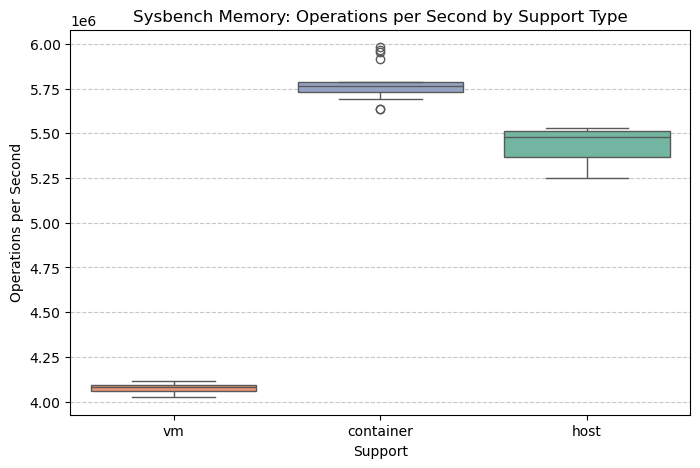

/tmp/ipykernel_19218/1941430383.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='support', y='transfer_rate_mibs', data=sysbench_memory, palette=custom_palette)


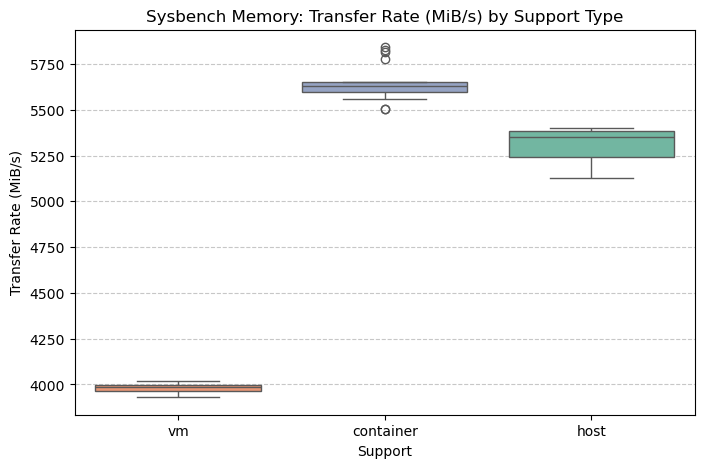

/tmp/ipykernel_19218/1941430383.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='support', y='total_time', data=sysbench_memory, palette=custom_palette)


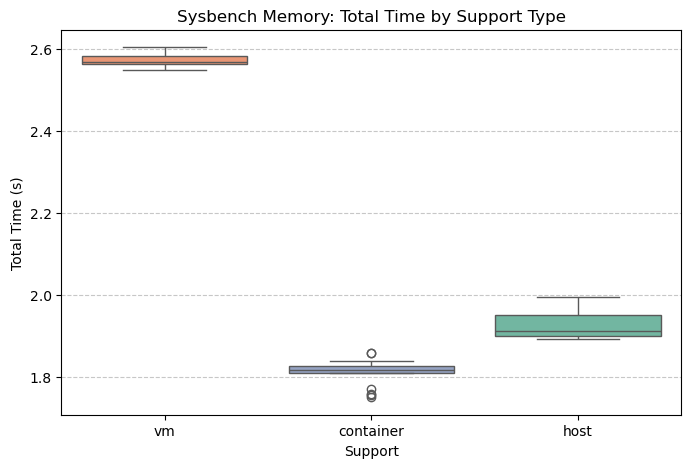

/tmp/ipykernel_19218/1941430383.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='support', y='latency_max', data=sysbench_memory, palette=custom_palette)


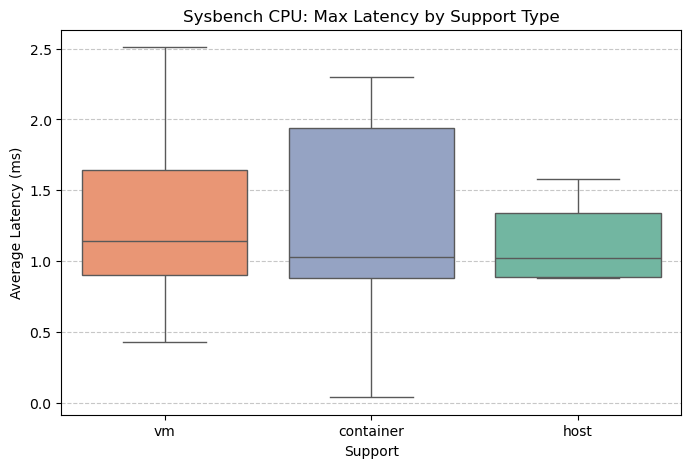

In [161]:
# Boxplot: ops_per_sec by support type
plt.figure(figsize=(8, 5))
sns.boxplot(x='support', y='ops_per_sec', data=sysbench_memory, palette=custom_palette)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Sysbench Memory: Operations per Second by Support Type')
plt.ylabel('Operations per Second')
plt.xlabel('Support')
plt.show()

# Boxplot: transfer_rate_mibs by support type
plt.figure(figsize=(8, 5))
sns.boxplot(x='support', y='transfer_rate_mibs', data=sysbench_memory, palette=custom_palette)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Sysbench Memory: Transfer Rate (MiB/s) by Support Type')
plt.ylabel('Transfer Rate (MiB/s)')
plt.xlabel('Support')
plt.show()

# Boxplot: total_time by support type
plt.figure(figsize=(8, 5))
sns.boxplot(x='support', y='total_time', data=sysbench_memory, palette=custom_palette)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Sysbench Memory: Total Time by Support Type')
plt.ylabel('Total Time (s)')
plt.xlabel('Support')
plt.show()

# Boxplot of latency_avg by support type
plt.figure(figsize=(8, 5))
sns.boxplot(x='support', y='latency_max', data=sysbench_memory, palette=custom_palette)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Sysbench CPU: Max Latency by Support Type')
plt.ylabel('Average Latency (ms)')
plt.xlabel('Support')
plt.show()

# `iperf`

In [120]:
iperf_standard = pd.read_csv('iperf - standard.csv')
iperf_standard.head()

,Support,Link,Interval (sec),Transfer,Unnamed: 4,Bitrate,Unnamed: 6
0,vm,node01,0.00-1.00,367.0,MBytes,3.08,Gbits/sec
1,vm,node01,1.00-2.00,385.0,MBytes,3.23,Gbits/sec
2,vm,node01,2.00-3.00,392.0,MBytes,3.29,Gbits/sec
3,vm,node01,3.00-4.00,398.0,MBytes,3.34,Gbits/sec
4,vm,node01,4.00-5.00,406.0,MBytes,3.41,Gbits/sec


In [121]:
# Define a mapping for metric prefixes to their decimal multipliers
prefix_multipliers = {
    'K': 1e3,
    'M': 1e6,
    'G': 1e9
}

# Helper function to convert value and unit to decimal
def convert_with_unit(value, unit):
    if pd.isnull(value) or pd.isnull(unit):
        return value
    unit = str(unit)
    for prefix, multiplier in prefix_multipliers.items():
        if unit.startswith(prefix):
            return float(value) * multiplier
    return float(value)

# Convert 'Transfer' and 'Bitrate' columns to decimal format
iperf_standard['Transfer (Bytes)'] = [
    convert_with_unit(val, unit) for val, unit in zip(iperf_standard['Transfer'], iperf_standard['Unnamed: 4'])
]
iperf_standard['Bitrate (bits/sec)'] = [
    convert_with_unit(val, unit) for val, unit in zip(iperf_standard['Bitrate'], iperf_standard['Unnamed: 6'])
]

# Drop the old columns and rename for clarity
iperf_standard = iperf_standard.drop(columns=['Transfer', 'Unnamed: 4', 'Bitrate', 'Unnamed: 6'])

In [167]:
iperf_standard.head()
# divide the column Bitrate (bits/sec) by 1e9 to convert to Gbps
iperf_standard['Bitrate (Gbps)'] = iperf_standard['Bitrate (bits/sec)'] / 1e9
# divide the column Transfer (Bytes) by 1e9 to convert to GB
iperf_standard['Transfer (GB)'] = iperf_standard['Transfer (Bytes)'] / 1e9
# drop the old columns
iperf_standard.drop(columns=['Bitrate (bits/sec)', 'Transfer (Bytes)'], inplace=True)
iperf_standard.head()

,Support,Link,Interval (sec),Bitrate (Gbps),Transfer (GB)
0,vm,node01,0.00-1.00,3.08,0.367
1,vm,node01,1.00-2.00,3.23,0.385
2,vm,node01,2.00-3.00,3.29,0.392
3,vm,node01,3.00-4.00,3.34,0.398
4,vm,node01,4.00-5.00,3.41,0.406


/tmp/ipykernel_19218/3847983744.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Support', y='Bitrate (Gbps)', data=iperf_standard, estimator=np.mean, ci='sd', palette=custom_palette)
/tmp/ipykernel_19218/3847983744.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Support', y='Bitrate (Gbps)', data=iperf_standard, estimator=np.mean, ci='sd', palette=custom_palette)


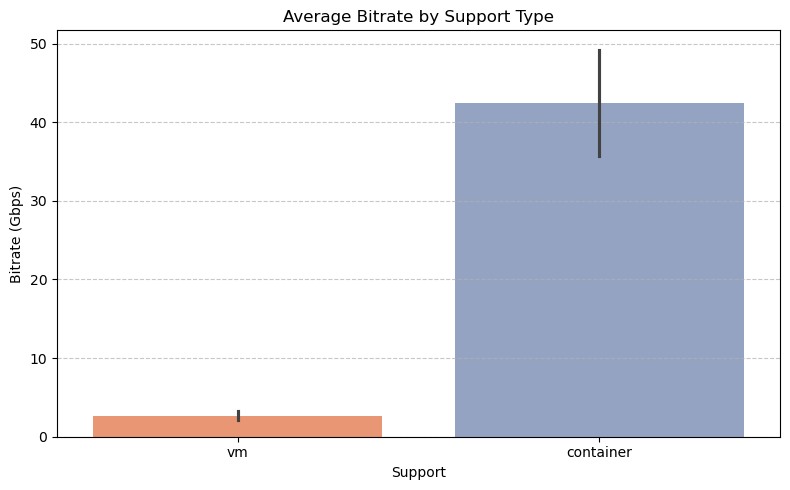

vm - Mean Bitrate: 2.66 Gbps, SD: 0.56
container - Mean Bitrate: 42.48 Gbps, SD: 6.75


In [175]:
# Plot average Bitrate by Support type
plt.figure(figsize=(8, 5))
sns.barplot(x='Support', y='Bitrate (Gbps)', data=iperf_standard, estimator=np.mean, ci='sd', palette=custom_palette)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Average Bitrate by Support Type')
plt.ylabel('Bitrate (Gbps)')
plt.xlabel('Support')
plt.tight_layout()
plt.show()

# print mean and sd for each support type
for support in iperf_standard['Support'].unique():
    mean_bitrate = iperf_standard[iperf_standard['Support'] == support]['Bitrate (Gbps)'].mean()
    sd_bitrate = iperf_standard[iperf_standard['Support'] == support]['Bitrate (Gbps)'].std()
    print(f'{support} - Mean Bitrate: {mean_bitrate:.2f} Gbps, SD: {sd_bitrate:.2f}')


/tmp/ipykernel_19218/2390595870.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Link', y='Bitrate (Gbps)', hue='Support', data=iperf_standard, estimator=np.mean, ci='sd', palette=custom_palette)


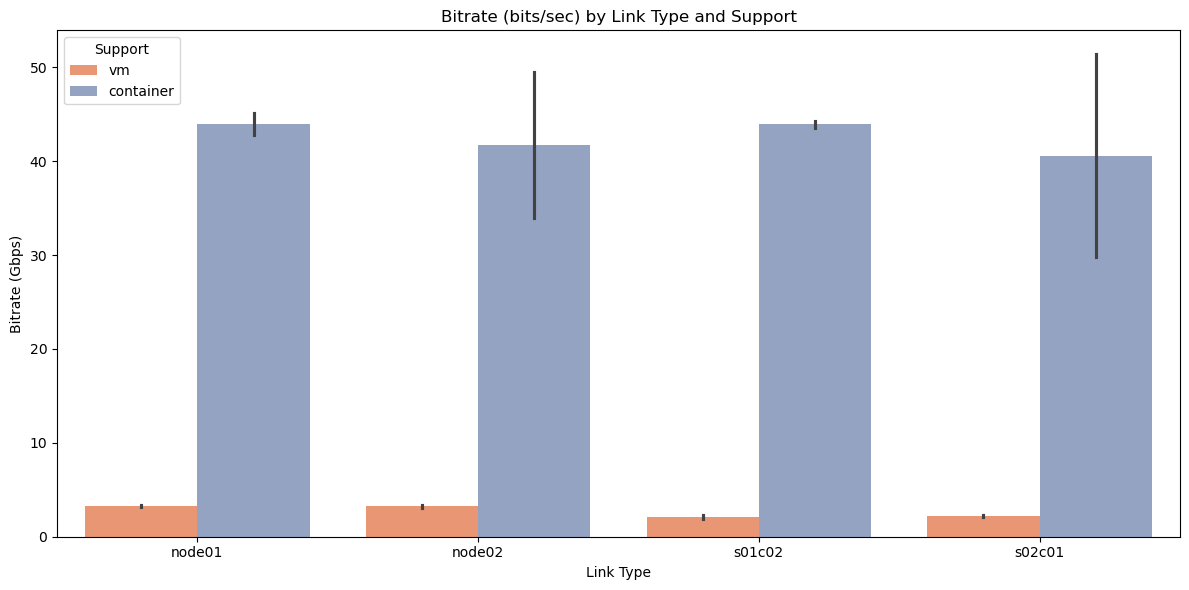

In [173]:
# Plot Bitrate (bits/sec) grouped by Support and Link type
plt.figure(figsize=(12, 6))
sns.barplot(x='Link', y='Bitrate (Gbps)', hue='Support', data=iperf_standard, estimator=np.mean, ci='sd', palette=custom_palette)
plt.title('Bitrate (bits/sec) by Link Type and Support')
plt.ylabel('Bitrate (Gbps)')
plt.xlabel('Link Type')
plt.legend(title='Support')
plt.tight_layout()
plt.show()

In [189]:
iperf_udp = pd.read_csv('iperf - upd.csv')
iperf_udp.head()


,Support,Link,Interval (sec),Transfer,Unnamed: 4,Bitrate,Unnamed: 6,Jitter,Unnamed: 8,Lost/Total Datagrams
0,vm,node01,0.00-1.03,109.0,KBytes,863.00,Kbits/sec,1.40,ms,0/77 (0%)
1,vm,node01,1.03-2.01,141.0,KBytes,1.19,Mbits/sec,2.43,ms,0/100 (0%)
2,vm,node01,2.01-3.09,132.0,KBytes,995.00,Kbits/sec,3.09,ms,0/93 (0%)
3,vm,node01,3.09-4.00,130.0,KBytes,1.17,Mbits/sec,1.53,ms,0/92 (0%)
4,vm,node01,4.00-5.13,124.0,KBytes,900.00,Kbits/sec,2.44,ms,0/88 (0%)


In [190]:
iperf_udp.drop(columns=['Interval (sec)',	'Transfer',	'Unnamed: 4', 'Lost/Total Datagrams'], inplace=True)
iperf_udp.head()

,Support,Link,Bitrate,Unnamed: 6,Jitter,Unnamed: 8
0,vm,node01,863.00,Kbits/sec,1.40,ms
1,vm,node01,1.19,Mbits/sec,2.43,ms
2,vm,node01,995.00,Kbits/sec,3.09,ms
3,vm,node01,1.17,Mbits/sec,1.53,ms
4,vm,node01,900.00,Kbits/sec,2.44,ms


In [191]:
iperf_udp['Bitrate (bits/sec)'] = [
    convert_with_unit(val, unit) for val, unit in zip(iperf_udp['Bitrate'], iperf_udp['Unnamed: 6'])
]

iperf_udp.drop(columns=['Bitrate', 'Unnamed: 6'], inplace=True)
iperf_udp.head()


,Support,Link,Jitter,Unnamed: 8,Bitrate (bits/sec)
0,vm,node01,1.40,ms,863000.0
1,vm,node01,2.43,ms,1190000.0
2,vm,node01,3.09,ms,995000.0
3,vm,node01,1.53,ms,1170000.0
4,vm,node01,2.44,ms,900000.0


In [192]:

# divide the column Bitrate (bits/sec) by 1e6 to convert to Mbps
iperf_udp['Bitrate (Mbps)'] = iperf_udp['Bitrate (bits/sec)'] / 1e6
# drop the old columns
iperf_udp.drop(columns=['Bitrate (bits/sec)'], inplace=True)
iperf_udp.head()

,Support,Link,Jitter,Unnamed: 8,Bitrate (Mbps)
0,vm,node01,1.40,ms,0.863
1,vm,node01,2.43,ms,1.190
2,vm,node01,3.09,ms,0.995
3,vm,node01,1.53,ms,1.170
4,vm,node01,2.44,ms,0.900


/tmp/ipykernel_19218/1972968197.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Support', y='Bitrate (Mbps)', data=iperf_udp, estimator=np.mean, ci='sd', palette=custom_palette)
/tmp/ipykernel_19218/1972968197.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Support', y='Bitrate (Mbps)', data=iperf_udp, estimator=np.mean, ci='sd', palette=custom_palette)


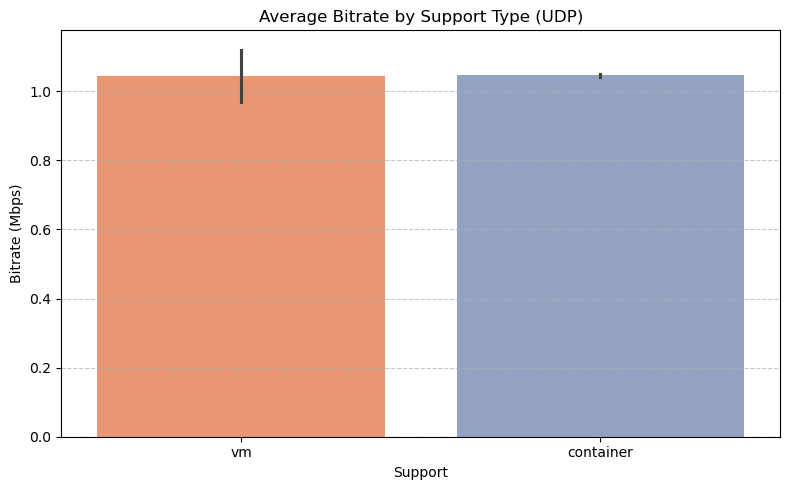

vm - Mean Bitrate: 1.04 Mbps, SD: 0.08
container - Mean Bitrate: 1.05 Mbps, SD: 0.00


In [193]:
# plot average Bitrate by Support type
plt.figure(figsize=(8, 5))
sns.barplot(x='Support', y='Bitrate (Mbps)', data=iperf_udp, estimator=np.mean, ci='sd', palette=custom_palette)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Average Bitrate by Support Type (UDP)')
plt.ylabel('Bitrate (Mbps)')
plt.xlabel('Support')
plt.tight_layout()
plt.show()

# print mean and sd for each support type
for support in iperf_udp['Support'].unique():
    mean_bitrate = iperf_udp[iperf_udp['Support'] == support]['Bitrate (Mbps)'].mean()
    sd_bitrate = iperf_udp[iperf_udp['Support'] == support]['Bitrate (Mbps)'].std()
    print(f'{support} - Mean Bitrate: {mean_bitrate:.2f} Mbps, SD: {sd_bitrate:.2f}')

/tmp/ipykernel_19218/1237226253.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Link', y='Bitrate (Mbps)', hue='Support', data=iperf_udp, estimator=np.mean, ci='sd', palette=custom_palette)


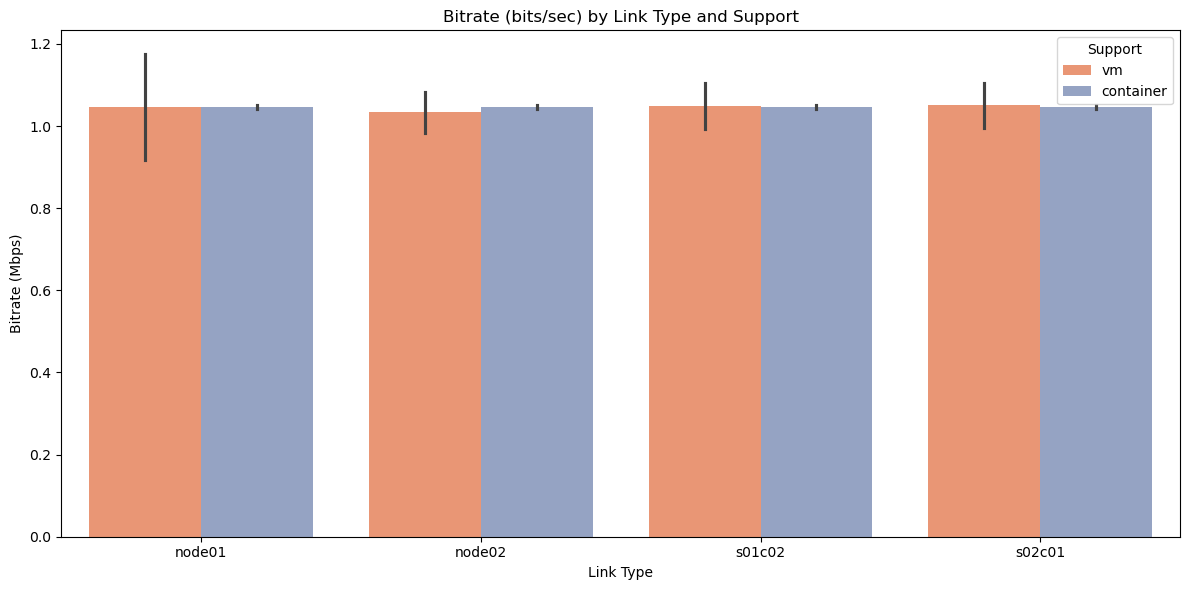

In [194]:
# Plot Bitrate (bits/sec) grouped by Support and Link type
plt.figure(figsize=(12, 6))
sns.barplot(x='Link', y='Bitrate (Mbps)', hue='Support', data=iperf_udp, estimator=np.mean, ci='sd', palette=custom_palette)
plt.title('Bitrate (bits/sec) by Link Type and Support')
plt.ylabel('Bitrate (Mbps)')
plt.xlabel('Link Type')
plt.legend(title='Support')
plt.tight_layout()
plt.show()

## retrans

In [200]:
iperf_retrans = pd.read_csv('iperf - retrans.csv')
iperf_retrans.head()

,Support,Link,Interval (sec),Transfer,Unnamed: 4,Bitrate,Unnamed: 6,Retr,Cwnd,Unnamed: 9
0,vm,node01,0.00-1.00,365.0,MBytes,3.06,Gbits/sec,1840,221,KBytes
1,vm,node01,1.00-2.00,382.0,MBytes,3.20,Gbits/sec,2618,215,KBytes
2,vm,node01,2.00-3.00,380.0,MBytes,3.18,Gbits/sec,2110,233,KBytes
3,vm,node01,3.00-4.00,393.0,MBytes,3.30,Gbits/sec,2125,219,KBytes
4,vm,node01,4.00-5.00,371.0,MBytes,3.11,Gbits/sec,2070,206,KBytes


In [201]:
iperf_retrans.drop(columns=['Interval (sec)', 'Transfer', 'Unnamed: 4', 'Retr', 'Cwnd', 'Unnamed: 9'], inplace=True)

In [203]:
iperf_retrans.head()

,Support,Link,Bitrate,Unnamed: 6
0,vm,node01,3.06,Gbits/sec
1,vm,node01,3.20,Gbits/sec
2,vm,node01,3.18,Gbits/sec
3,vm,node01,3.30,Gbits/sec
4,vm,node01,3.11,Gbits/sec


In [204]:
iperf_retrans['Bitrate (bits/sec)'] = [
    convert_with_unit(val, unit) for val, unit in zip(iperf_retrans['Bitrate'], iperf_retrans['Unnamed: 6'])
]

iperf_retrans.drop(columns=['Bitrate', 'Unnamed: 6'], inplace=True)
iperf_retrans.head()

,Support,Link,Bitrate (bits/sec)
0,vm,node01,3.060000e+09
1,vm,node01,3.200000e+09
2,vm,node01,3.180000e+09
3,vm,node01,3.300000e+09
4,vm,node01,3.110000e+09


In [205]:
# divide the column Bitrate (bits/sec) by 1e9 to convert to Gbps
iperf_retrans['Bitrate (Gbps)'] = iperf_retrans['Bitrate (bits/sec)'] / 1e9
# drop the old columns
iperf_retrans.drop(columns=['Bitrate (bits/sec)'], inplace=True)
iperf_retrans.head()

,Support,Link,Bitrate (Gbps)
0,vm,node01,3.06
1,vm,node01,3.20
2,vm,node01,3.18
3,vm,node01,3.30
4,vm,node01,3.11


/tmp/ipykernel_19218/1922336731.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Support', y='Bitrate (Gbps)', data=iperf_retrans, estimator=np.mean, ci='sd', palette=custom_palette)
/tmp/ipykernel_19218/1922336731.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Support', y='Bitrate (Gbps)', data=iperf_retrans, estimator=np.mean, ci='sd', palette=custom_palette)


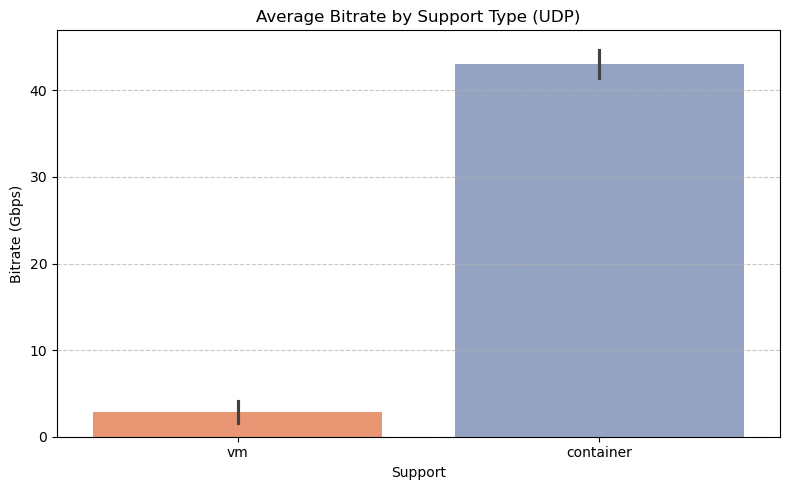

In [208]:
# plot average Bitrate by Support type
plt.figure(figsize=(8, 5))
sns.barplot(x='Support', y='Bitrate (Gbps)', data=iperf_retrans, estimator=np.mean, ci='sd', palette=custom_palette)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Average Bitrate by Support Type (UDP)')
plt.ylabel('Bitrate (Gbps)')
plt.xlabel('Support')
plt.tight_layout()
plt.show()

/tmp/ipykernel_19218/1780329738.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Link', y='Bitrate (Gbps)', hue='Support', data=iperf_retrans, estimator=np.mean, ci='sd', palette=custom_palette)


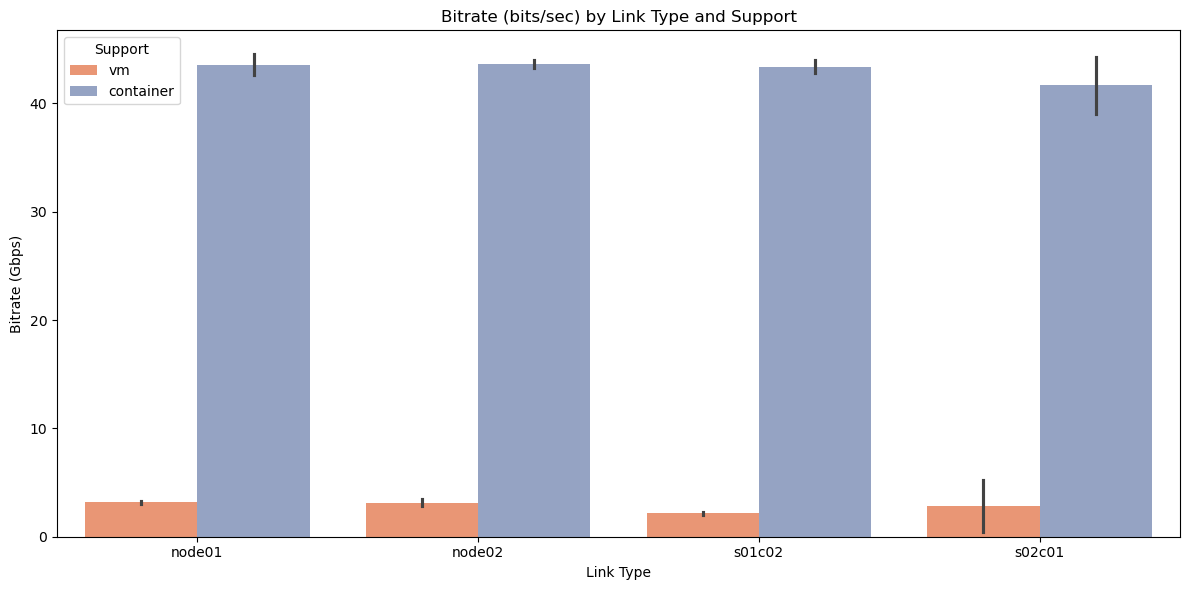

In [210]:
# Plot Bitrate (bits/sec) grouped by Support and Link type
plt.figure(figsize=(12, 6))
sns.barplot(x='Link', y='Bitrate (Gbps)', hue='Support', data=iperf_retrans, estimator=np.mean, ci='sd', palette=custom_palette)
plt.title('Bitrate (bits/sec) by Link Type and Support')
plt.ylabel('Bitrate (Gbps)')
plt.xlabel('Link Type')
plt.legend(title='Support')
plt.tight_layout()
plt.show()

# `iozone`

## writer on shared folder

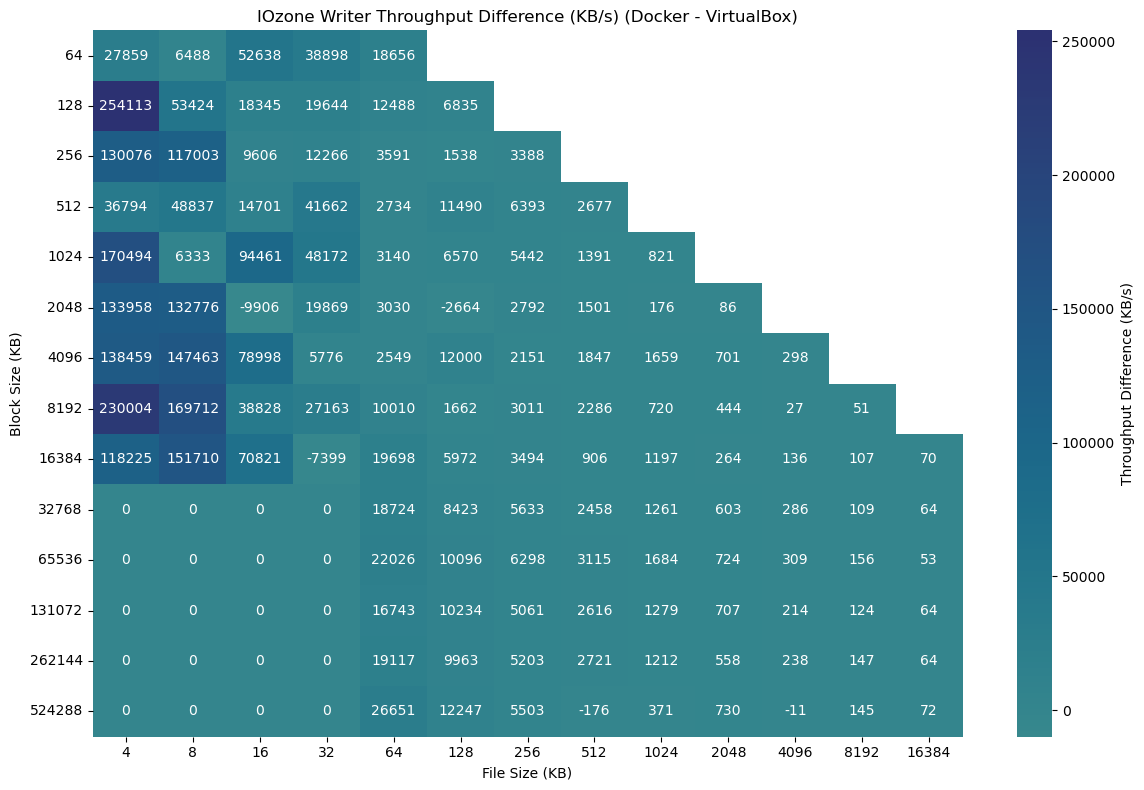

In [245]:
# Load CSV files
vbox_df = pd.read_csv("vm_sh_writer_report.csv")
docker_df = pd.read_csv("doc_sh_writer_report.csv")

# Set 'block_size' as the index
vbox_df.set_index('block_size', inplace=True)
docker_df.set_index('block_size', inplace=True)

# Convert all column headers to integers for sorting
vbox_df.columns = vbox_df.columns.astype(int)
docker_df.columns = docker_df.columns.astype(int)
vbox_df.index = vbox_df.index.astype(int)
docker_df.index = docker_df.index.astype(int)

# Sort rows and columns
vbox_df = vbox_df.sort_index().sort_index(axis=1)
docker_df = docker_df.sort_index().sort_index(axis=1)

# Calculate difference: Docker - VirtualBox
diff_df = docker_df.astype(float) - vbox_df.astype(float)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(diff_df, cmap="crest", center=0, annot=True, fmt=".0f",
            cbar_kws={'label': 'Throughput Difference (KB/s)'})
plt.title("IOzone Writer Throughput Difference (KB/s) (Docker - VirtualBox)")
plt.xlabel("File Size (KB)")
plt.ylabel("Block Size (KB)")
plt.tight_layout()
plt.show()


## write local

In [197]:
# Load both CSV files
vbox_loc = pd.read_csv("vm_loc_writer_report.csv")
docker_loc = pd.read_csv("doc_loc_writer_report.csv")
host_loc = pd.read_csv("host_loc_writer_report.csv")

In [198]:
# Convert 'block_size' to index
vbox_loc.set_index('block_size', inplace=True)
docker_loc.set_index('block_size', inplace=True)
host_loc.set_index('block_size', inplace=True)

# Convert column headers to strings (ensure consistency)
vbox_loc.columns = vbox_loc.columns.astype(str)
docker_loc.columns = docker_loc.columns.astype(str)
host_loc.columns = host_loc.columns.astype(str)


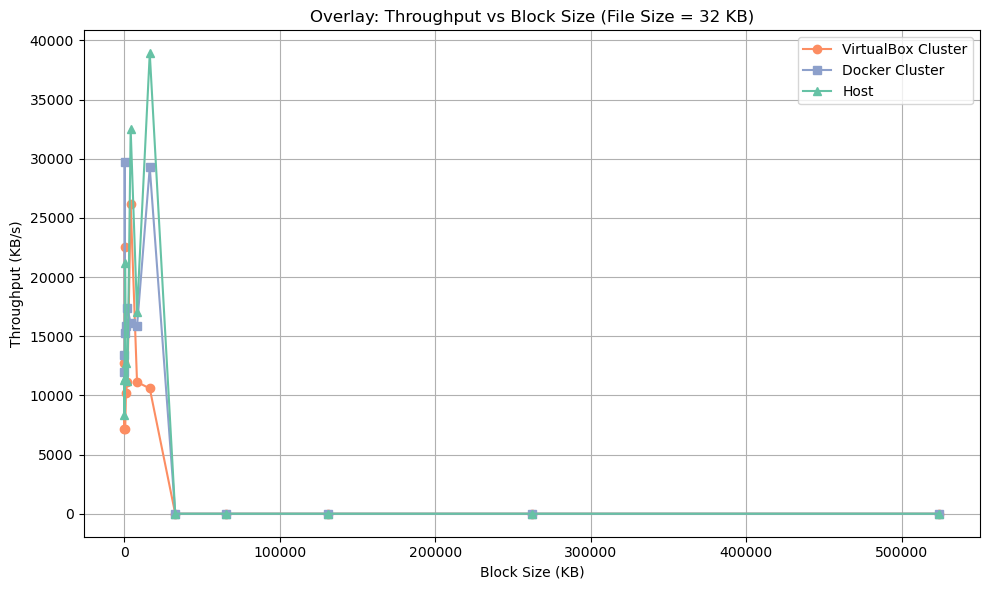

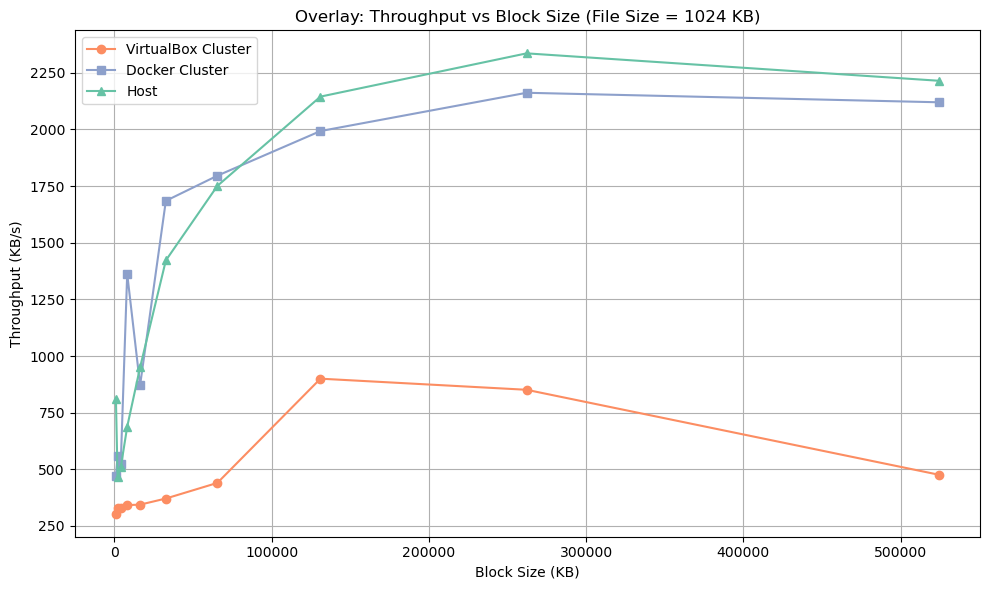

In [222]:

# ----------- Overlay Line Plot -----------
def plot_overlay(file_size="1024", vbox_loc=vbox_loc, docker_loc=docker_loc, host_loc=host_loc):
    plt.figure(figsize=(10, 6))
    plt.plot(vbox_loc.index, vbox_loc[file_size], marker='o', label='VirtualBox Cluster', color=palette[1])
    plt.plot(docker_loc.index, docker_loc[file_size], marker='s', label='Docker Cluster', color=palette[2])
    if host_loc is not None:
        # Only plot host_loc if it exists
        plt.plot(host_loc.index, host_loc[file_size], marker='^', label='Host', color=palette[0])

    plt.xlabel("Block Size (KB)")
    plt.ylabel("Throughput (KB/s)")
    plt.title(f"Overlay: Throughput vs Block Size (File Size = {file_size} KB)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ----------- Run Plots ----------- 


plot_overlay(file_size="32")

plot_overlay(file_size="1024")


## write on shared

In [219]:
vm_write_sh = pd.read_csv("vm_sh_writer_report.csv")
docker_write_sh = pd.read_csv("doc_sh_writer_report.csv")

In [220]:
# Convert 'block_size' to index
vm_write_sh.set_index('block_size', inplace=True)
docker_write_sh.set_index('block_size', inplace=True)

# Convert column headers to strings (ensure consistency)
vm_write_sh.columns = vm_write_sh.columns.astype(str)
docker_write_sh.columns = docker_write_sh.columns.astype(str)


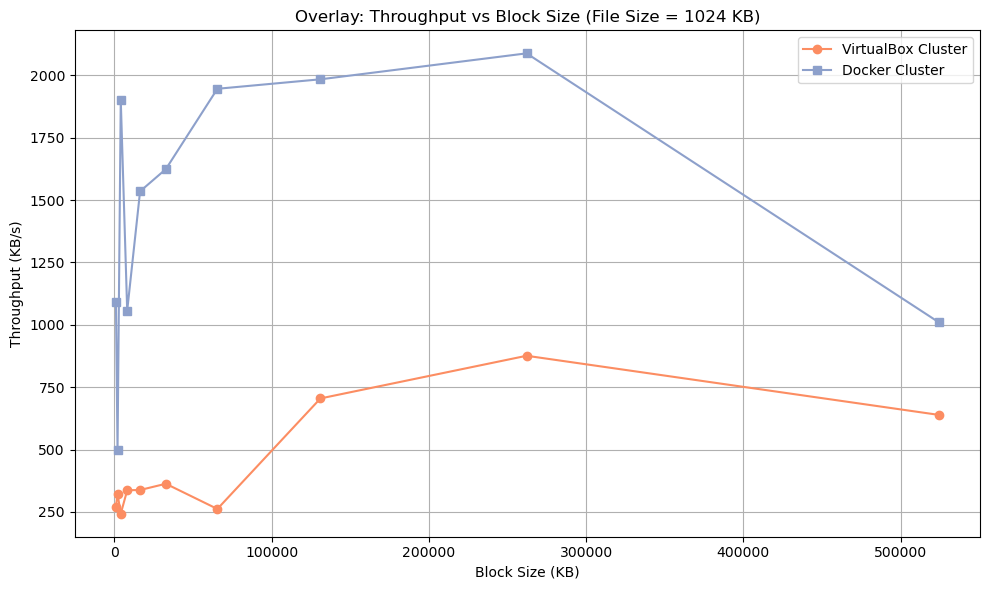

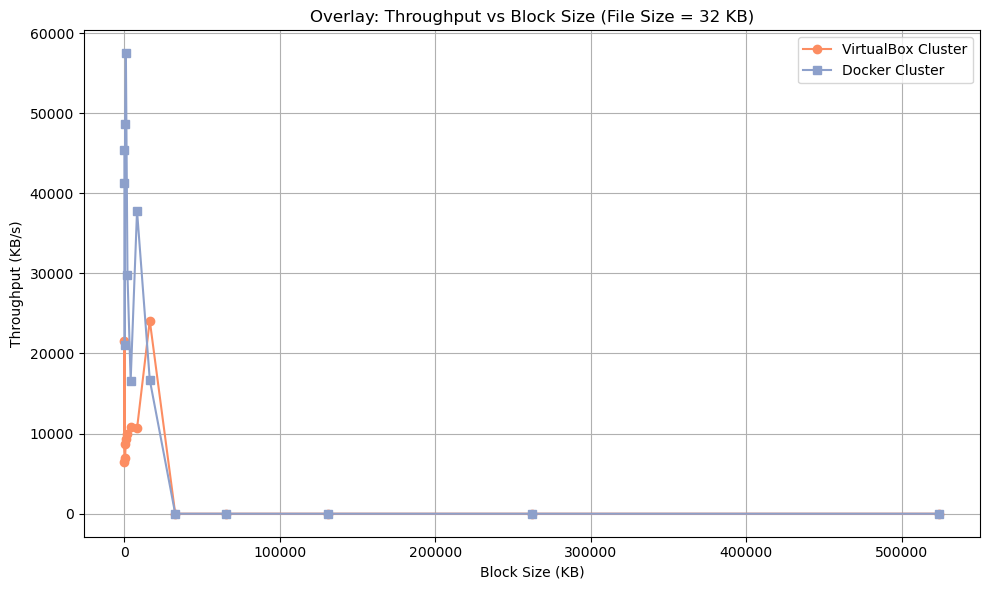

In [224]:
plot_overlay(file_size="1024", vbox_loc=vm_write_sh, docker_loc=docker_write_sh, host_loc=None)
plot_overlay(file_size="32", vbox_loc=vm_write_sh, docker_loc=docker_write_sh, host_loc=None)

# read local

In [225]:
vm_loc_read = pd.read_csv("vm_loc_reader_report.csv")
docker_loc_read = pd.read_csv("doc_loc_reader_report.csv")
host_loc_read = pd.read_csv("host_loc_reader_report.csv")
# Convert 'block_size' to index
vm_loc_read.set_index('block_size', inplace=True)
docker_loc_read.set_index('block_size', inplace=True)
host_loc_read.set_index('block_size', inplace=True)
# Convert column headers to strings (ensure consistency)
vm_loc_read.columns = vm_loc_read.columns.astype(str)
docker_loc_read.columns = docker_loc_read.columns.astype(str)
host_loc_read.columns = host_loc_read.columns.astype(str)

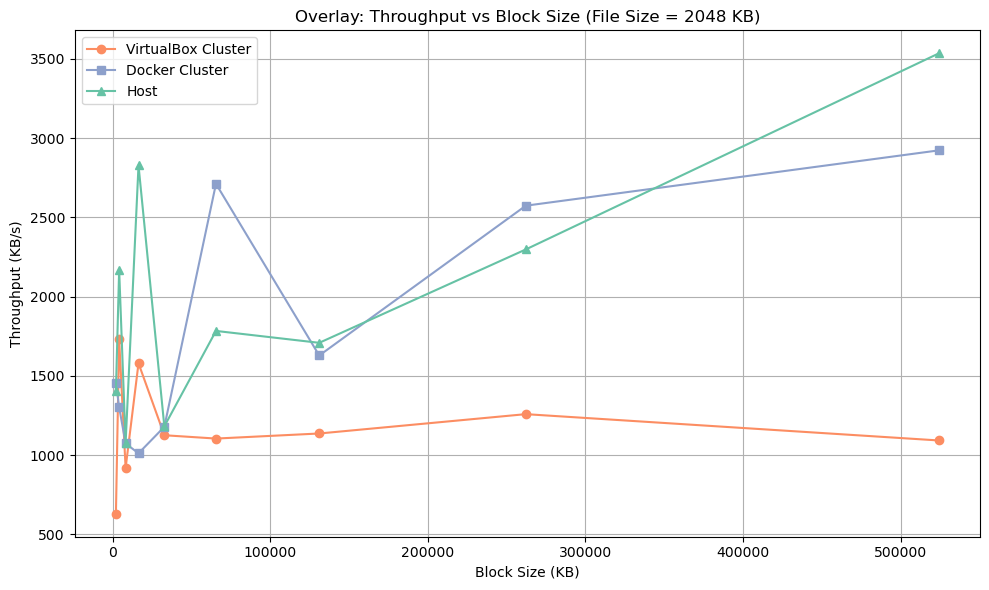

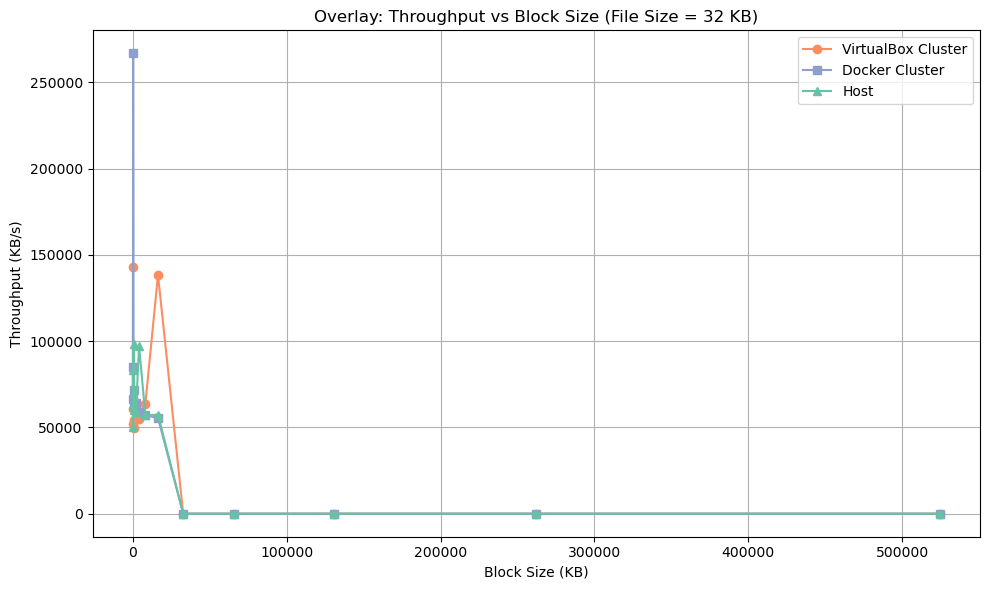

In [227]:
plot_overlay(file_size="2048", vbox_loc=vm_loc_read, docker_loc=docker_loc_read, host_loc=host_loc_read)
plot_overlay(file_size="32", vbox_loc=vm_loc_read, docker_loc=docker_loc_read, host_loc=host_loc_read)

## read shared

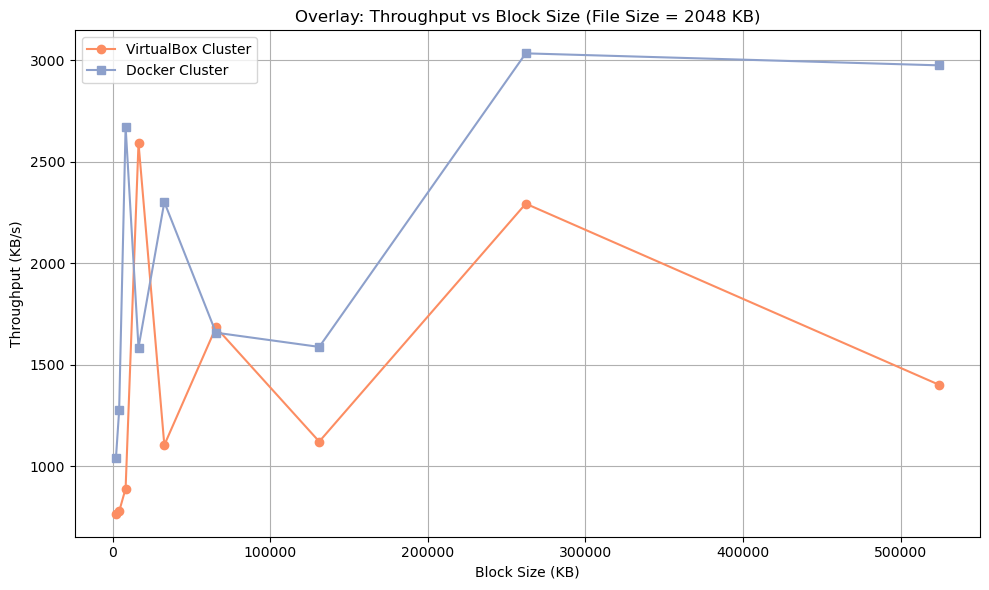

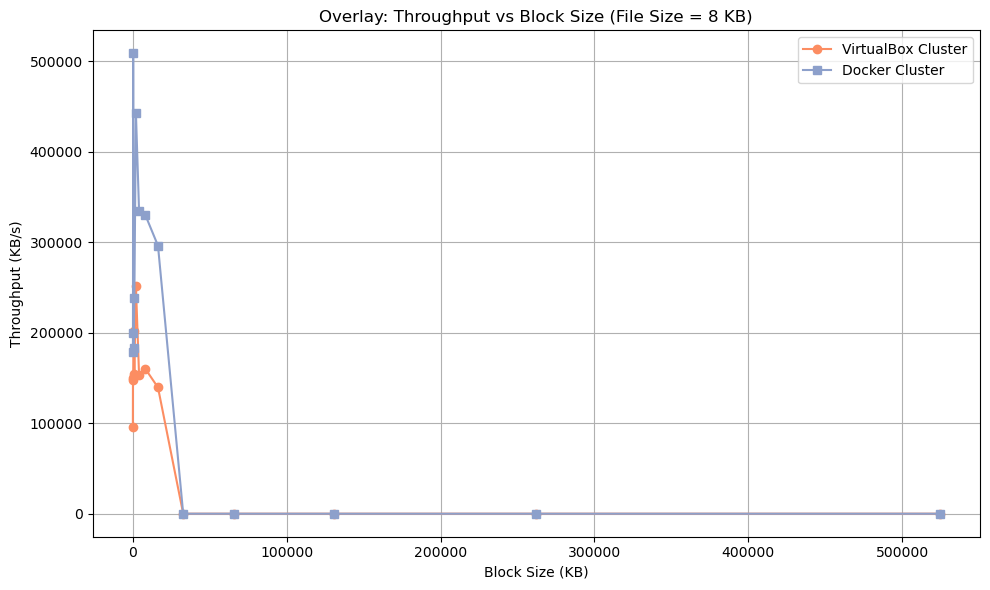

In [229]:
vm_sh_read = pd.read_csv("vm_sh_reader_report.csv")
docker_sh_read = pd.read_csv("doc_sh_reader_report.csv")
# Convert 'block_size' to index
vm_sh_read.set_index('block_size', inplace=True)
docker_sh_read.set_index('block_size', inplace=True)
# Convert column headers to strings (ensure consistency)
vm_sh_read.columns = vm_sh_read.columns.astype(str)
docker_sh_read.columns = docker_sh_read.columns.astype(str)
plot_overlay(file_size="2048", vbox_loc=vm_sh_read, docker_loc=docker_sh_read, host_loc=None)
plot_overlay(file_size="8", vbox_loc=vm_sh_read, docker_loc=docker_sh_read, host_loc=None)

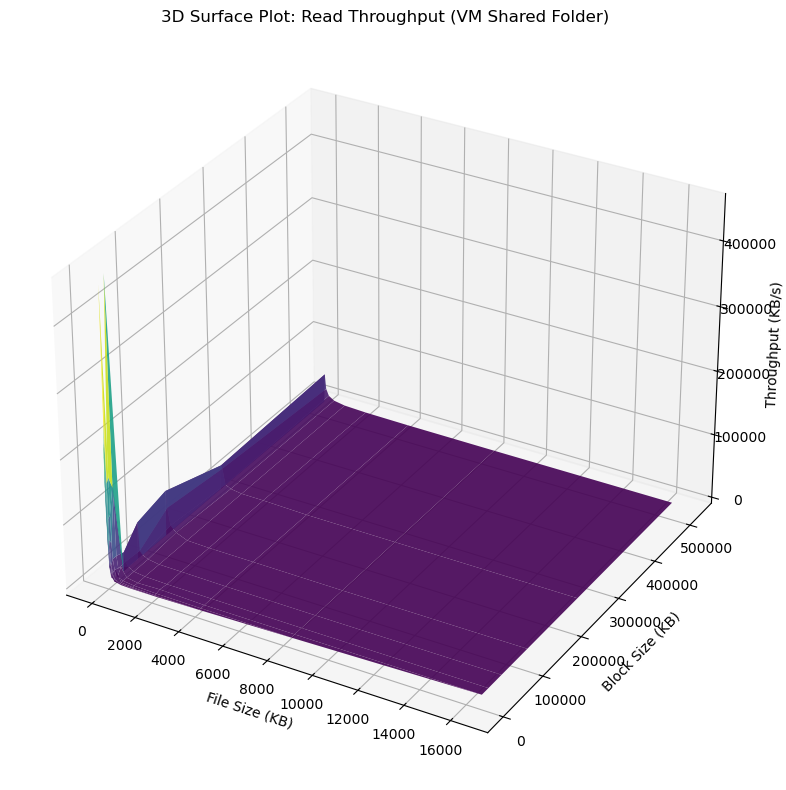

In [240]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(file = vm_sh_read, title = '3D Surface Plot: Read Throughput (VM Shared Folder)'):
    # Prepare data for 3D plotting
    block_sizes = vm_sh_read.index.astype(int)
    file_sizes = vm_sh_read.columns.astype(int)
    X, Y = np.meshgrid(file_sizes, block_sizes)
    Z = vm_sh_read.values.astype(float)
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    # Plot surface (NaN values in Z will be ignored automatically)
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.9)
    ax.set_xlabel('File Size (KB)')
    ax.set_ylabel('Block Size (KB)')
    ax.set_zlabel('Throughput (KB/s)')
    ax.set_title('3D Surface Plot: Read Throughput (VM Shared Folder)')
    plt.tight_layout()
    plt.show()

plot_3d(file = vm_sh_read)